<a href="https://colab.research.google.com/github/Dyl-cmyk/datascience/blob/projects/DylaLaurUnit5Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unit 5 Project: Making a Generalized Linear Model (1 predictor)



In [1]:
!pip install "preliz[full,notebook]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.4/38.4 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 514.2/514.2 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.9 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.13.1
    Uninstalling scipy-1.13.1:
      Successfully uninstalled scipy-1.13.1
  Attempting uninstall: nbclient
    Found existing installation: nbclient 0.10.1
    Uninstalling nbclient-0.10.1:
      Successfully uninstalled nbclient-0.10.1


In [2]:
import preliz as pz

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import arviz as az
import xarray as xr
import pymc as pm
import pytensor
import pytensor.tensor as pt
import statsmodels.api as sm
import os
import matplotlib.pyplot as plt

from pymc.pytensorf import collect_default_updates
from scipy.interpolate import PchipInterpolator

#Unit 5 Project: Correlation with linear models??

My idea for this project was to undertake modeling stock market trends with the linear model skilles we have been learning in unit 5. For this project I decided to collect stock market data on the "S&P 500" which is considered an "accurate representation of the market overall" and has a rather constant, consistent 10% return year over.

https://www.statmuse.com/money

Website Used ^

NOTE: This website is not known for accurate financial data, but is close enough to accurate data (much of which was paywalled or in harder formats to copy down) that this data will still be good enough to achieve my goals, but I do not recommend this data be used for financial decisions.



In [5]:
#Here is the cleaned data of JUST the S&P 500 From 2020 to 2024
#The data is broken up by month with 1 being January 2020 and 13 being January 2021 etc.
url_SMD = 'https://raw.githubusercontent.com/Dyl-cmyk/datascience/refs/heads/main/Unit%205%20Project%20Data%20-%20Sheet1%20(1).csv'
SMD = pd.read_csv(url_SMD)

In [6]:
SMD

,Month,Percent Return
0,1,-0.590
1,2,-8.700
2,3,-13.100
3,4,16.590
4,5,6.110
5,6,2.020
6,7,5.320
7,8,6.450
8,9,-4.120
9,10,-3.420


My goal is to generally follow the "howell" model from the exercises as best I can until I encounter issues

Text(0, 0.5, 'Percent Return')

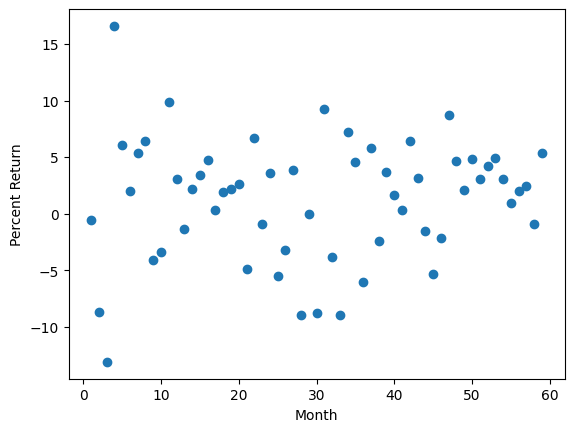

In [ ]:
plt.scatter(SMD['Month'] , SMD['Percent Return'],)

#label axes
plt.xlabel("Month")
plt.ylabel("Percent Return")

Allthough I am aware that this data may need some more fanageling I am going to try to run it as a linear model, as is the expectataion, to see how it performs

##Attempt #1 What we've been doing so far

In [ ]:

#SMD = Stock Market Data
#Lin = LINear model
with pm.Model() as model_SMDLin:


    #im using a basic set of priors here in order to "test the waters"
    α = pm.Normal("α", sigma=10)
    β = pm.Normal("β", sigma=10)

    #mean line, same as all the other ones
    μ = pm.Deterministic("μ", α + β * SMD.Month)

    #prior for standard deviation...i should probably change this
    σ = pm.HalfNormal("σ", sigma = 10)

    #normal likelihood
    y_pred = pm.Normal("y_pred", mu=μ, sigma=σ, observed=SMD['Percent Return'])

    idata_SMDLin = pm.sample()

Output()

Output()

Text(0, 0.5, 'Percent Return')

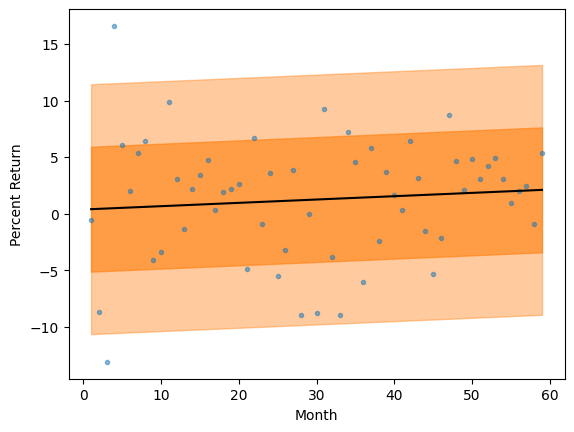

In [ ]:
#taken from the exercises
_, ax = plt.subplots()

ax.plot(SMD.Month, SMD['Percent Return'], "C0.", alpha=.5)

posterior_how = az.extract(idata_SMDLin)

μ_m = posterior_how["μ"].mean("sample").values
σ_m = posterior_how["σ"].mean("sample").values

ax.plot(SMD.Month, μ_m, c="k")
ax.fill_between(SMD.Month, μ_m + 1 * σ_m, μ_m - 1 * σ_m, alpha=0.6, color="C1")
ax.fill_between(SMD.Month, μ_m + 2 * σ_m, μ_m - 2 * σ_m, alpha=0.4, color="C1")

ax.set_xlabel("Month")
ax.set_ylabel("Percent Return")

HEY! It RAN! That's good.

After taking a look at it. The data confirms my perdiction that there is indeed an upward trend in the stock market (id hope there's one if people tell you "its a good idea to invest")

this isn't really why we are here though. let's take a look at the PPC now

In [ ]:
pm.sample_posterior_predictive(
    idata_SMDLin, model = model_SMDLin, extend_inferencedata=True
    )

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='y_pred'>

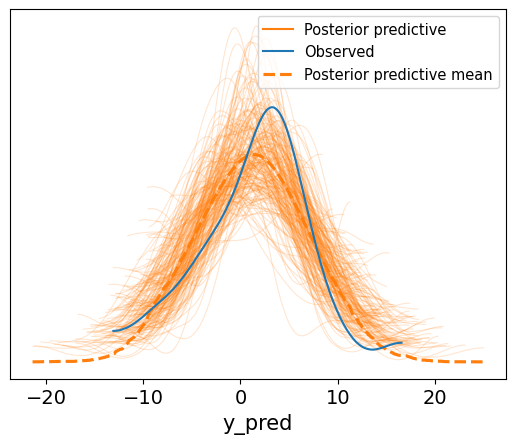

In [ ]:
az.plot_ppc(idata_SMDLin, num_pp_samples=200, colors=["C1", "C0", "C1"])

Okay! this is good! the model observed the data as some version of a normal distrobution...this may be because of the priors used or just because normals are, well, normal.

Additionally, most of the PPC's it ran where also normal! This means we are probably on the right track.

##Attempt #2 Timeseires implementation

Now I am going to try to implement this autoregressive model tactics to help line up the data better.

The model below was borrowed from the link in the following text box. I used to to help show me how to implement "timeseires autoregressive models" this is used when datasets are Autoregressive, or their next value has some correlation to their previous value based on time. I am still unsure exacly what it all means, but im doing my best to learn.

Website used: https://www.pymc.io/projects/examples/en/latest/time_series/Time_Series_Generative_Graph.html

Text(0.5, 1.0, 'S&P 500 Data')

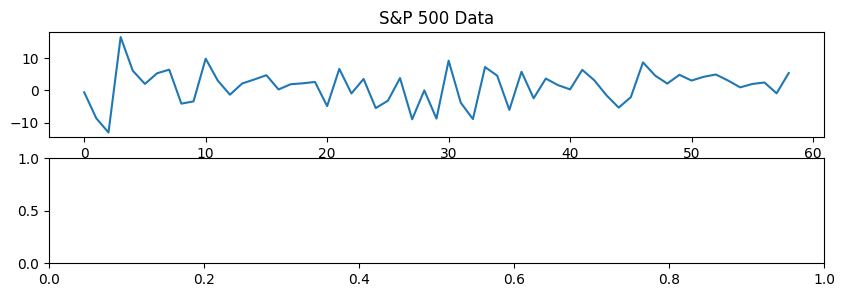

In [ ]:
#this is just a graph of what the data looks like...basically if you opened the S&P 500 on a finance app this is its closing/opening
fig, axs = plt.subplots(2, 1, figsize=(10, 3))
axs[0].plot(SMD["Percent Return"], label="Percent Return")
axs[0].set_title("S&P 500 Data")

In [ ]:
#Seprate section for "lags" and "Time seires length" to keep it organized

#This probably needs to be messed with/figured out more
#lags seems to be an arbatrairy number
lags = 3
#What is this? The amount of datapoints I have I think...
timeseries_length = 59

In [ ]:
coords = {
    "lags": range(-lags, 0),
    "steps": range(timeseries_length - lags),
    "timeseries_length": range(timeseries_length),
}
#SNPAR 1 = SNP 500 AutoRegressive 1
with pm.Model(coords=coords, check_bounds=False) as model_SNPAR1:
    rho = pm.Normal(name="rho", mu=0, sigma=10, dims=("lags",))
    sigma = pm.HalfNormal(name="sigma", sigma=10)
    # We need one init variable for each lag, hence size= 3
    init = pm.Normal.dist(10, size=3)

    SNPAR = pm.AR("SNPAR", rho=rho, sigma=sigma, init_dist=init, observed=SMD["Percent Return"], ar_order= 2, constant=True)
    idata_SMDAR = pm.sample()

Output()

Output()

In [ ]:
pm.sample_posterior_predictive(
    idata_SMDAR, model = model_SNPAR1, extend_inferencedata=True
    )

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='SNPAR'>

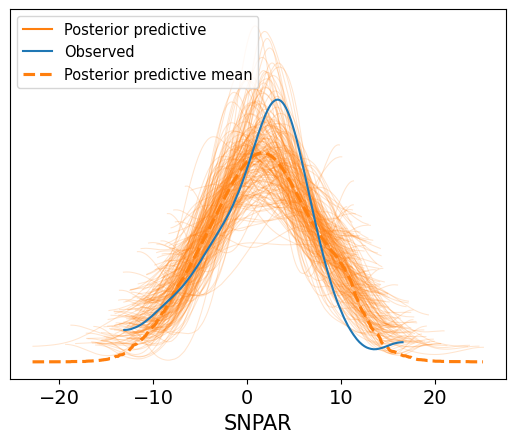

In [ ]:
az.plot_ppc(idata_SMDAR, num_pp_samples=200, colors=["C1", "C0", "C1"])

AHHHH

It ran!!! After like 4 hours of trying it worked! Unfourtinately it doesnt look a ton better than the last one, but now that the model runs I am going to try to tune it in different ways.

##Tuning #1 Lags

In [ ]:

#I am simply going to play with "extreme" lags settings to see what this does
#I Tried 20, 1, and 2 lags...the results are below
lags = 2
timeseries_length = 59

In [ ]:
coords = {
    "lags": range(-lags, 0),
    "steps": range(timeseries_length - lags),
    "timeseries_length": range(timeseries_length),
}
with pm.Model(coords=coords, check_bounds=False) as model_SNPAR2:
    rho = pm.Normal(name="rho", mu=0, sigma=10, dims=("lags",))
    sigma = pm.HalfNormal(name="sigma", sigma=10)
    # We need one init variable for each lag
    init = pm.Normal.dist(10, size=2)

    SNPAR2 = pm.AR("SNPAR2", rho=rho, sigma=sigma, init_dist=init, observed=SMD["Percent Return"], ar_order= 2, constant=True)
    idata_SMDAR2 = pm.sample()

Output()

Output()

In [ ]:
pm.sample_posterior_predictive(
    idata_SMDAR2, model = model_SNPAR2, extend_inferencedata=True
    )

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='SNPAR2'>

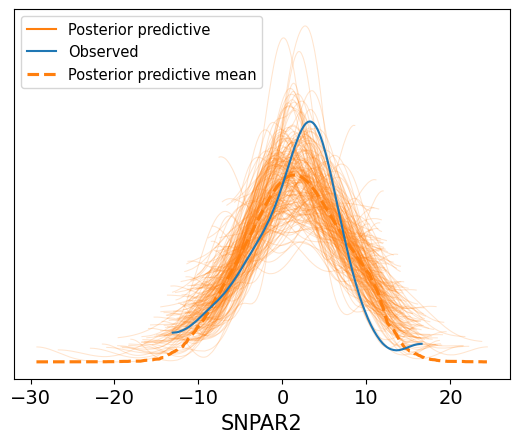

In [ ]:
#This is 20 lags... it looks better...i am going to try to go down now
az.plot_ppc(idata_SMDAR2, num_pp_samples=200, colors=["C1", "C0", "C1"])

<Axes: xlabel='SNPAR'>

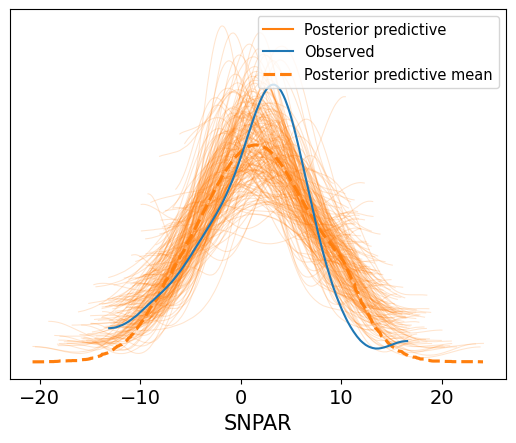

In [ ]:
#I am saving this as a reference of what 1 Lags looks like...it seems to have done what i was trying to do...
 #(my goal is to make the Posterior Perdictive lines move more toward the observed)
 #I think im going to adjust the priors then come back to the lags

az.plot_ppc(idata_SMDAR2, num_pp_samples=200, colors=["C1", "C0", "C1"])

I think I am going to stick to 2 Lags for now...it seems to do the best

##Tuning #2 Priors

<Axes: >

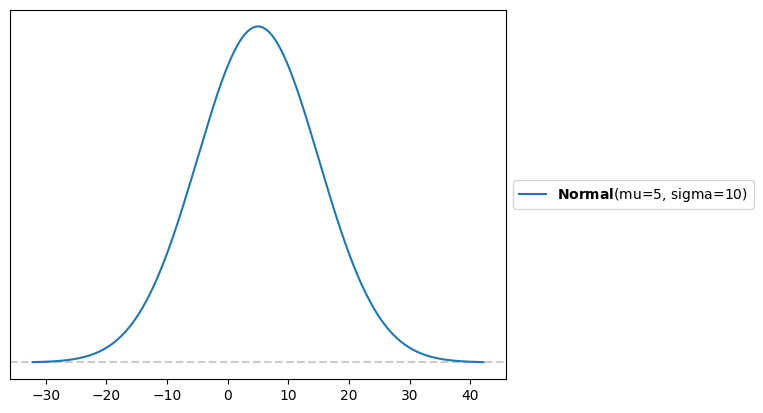

In [ ]:
#First im taking the distrobutions out to look at them and try to change them
pz.Normal(mu=0, sigma=10).plot_pdf()


<Axes: >

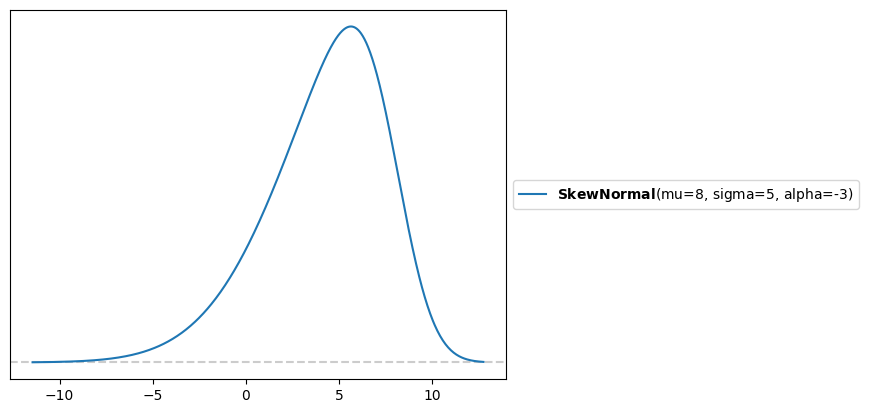

In [ ]:
#im gonna replace that normal ^^ with a skew normal to try to match the negative skew of the Posterior
pz.SkewNormal(mu=6, sigma=5, alpha=-3).plot_pdf()

interactive(children=(FloatSlider(value=5.0, description='sigma (0, inf)', max=15.0, min=2.220446049250313e-16…

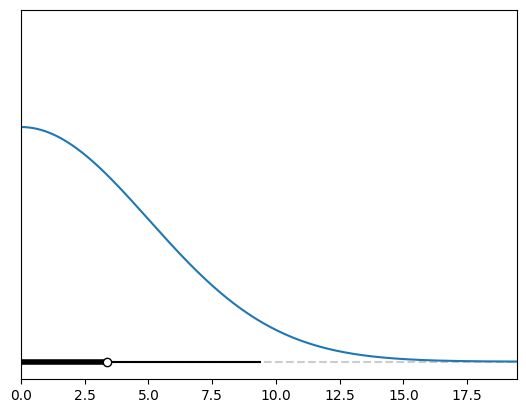

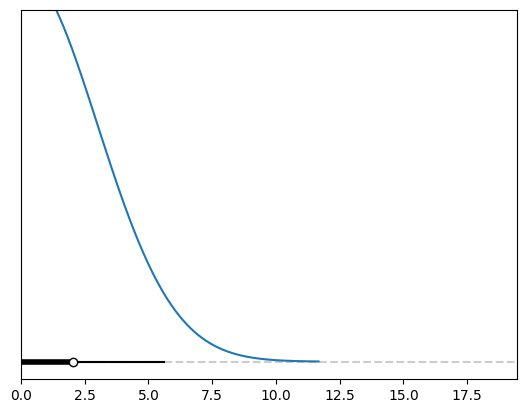

In [ ]:
#im just going to "retune" this graph to see what i can do
pz.HalfNormal(sigma=5).plot_interactive()

In [ ]:
#yk what this is for by now
#keeping 2 lags for the rest of the time
lags = 2
timeseries_length = 59

In [ ]:
coords = {
    "lags": range(-lags, 0),
    "steps": range(timeseries_length - lags),
    "timeseries_length": range(timeseries_length),
}
with pm.Model(coords=coords, check_bounds=False) as model_SNPAR3:
    rho = pm.SkewNormal(name="rho", mu=6, sigma=5, alpha=-3, dims=("lags",))
    sigma = pm.HalfNormal(name="sigma", sigma=5)
    # We need one init variable for each lag
    init = pm.Normal.dist(10, size=2)
                          #I also did some tuning on the line below...heres what i found
                                                                               #ar_order has to be a sweet spot number (it begian as 2 and didnt like 3+ and the ppc didnt like 1 )
                                                                               #Constant= False is default, but this one should be true or else you get a big error
    SNPAR3 = pm.AR("SNPAR3", rho=rho, sigma=sigma, init_dist=init, observed=SMD["Percent Return"], ar_order= 2, constant=True)
    idata_SMDAR3 = pm.sample()

Output()

Output()

In [ ]:
pm.sample_posterior_predictive(
    idata_SMDAR3, model = model_SNPAR3, extend_inferencedata=True
    )

Output()

Inference data with groups:
	> posterior
	> posterior_predictive
	> sample_stats
	> observed_data

<Axes: xlabel='SNPAR3'>

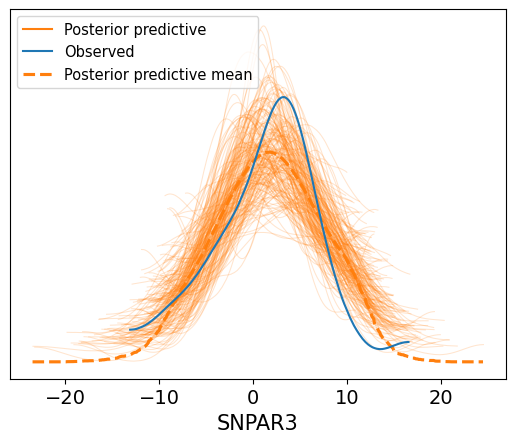

In [ ]:
#Check Bounds = False
az.plot_ppc(idata_SMDAR3, num_pp_samples=200, colors=["C1", "C0", "C1"])

<Axes: xlabel='SNPAR3'>

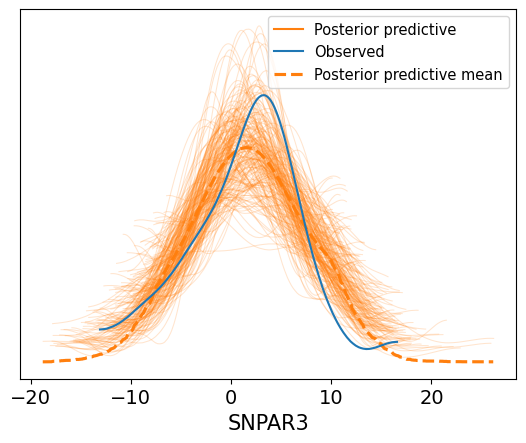

In [ ]:
#Check Bounds = True
az.plot_ppc(idata_SMDAR3, num_pp_samples=200, colors=["C1", "C0", "C1"])

Okay, that was kind of a lot of work for not much back. Its time to bite the bullet and just do the custom likelihood

##Tuning #3 Custom Likelihood

I was, unfourtinatley, unable to finish my custom likelihood before I had to turn this project in. But basically this is a self-made verson of the AR (autoregressive) Pymc function that allows for more tuning in order to match the data better...Ill walk you thorugh the pieces I know

In [7]:
#some extra parameters that need to be defined
lags = 2
timeseries_length = 59
df=SMD

In [17]:
#magical math below that I am not sure what it's doing
def calc_ar_step(lag_coefs, n_eqs, n_lags, df):
    ars = []
    for j in range(n_eqs):
        ar = pm.math.sum(
            [
                pm.math.sum(lag_coefs[j, i] * df.values[n_lags - (i + 1) : -(i + 1)], axis=-1)
                for i in range(n_lags)
            ],
            axis=0,
        )
        ars.append(ar)
    beta = pm.math.stack(ars, axis=-1)

    return beta
### Make the model in such a way that it can handle different specifications of the likelihood term
### and can be run for simple prior predictive checks. This latter functionality is important for debugging of
### shape handling issues. Building a VAR model involves quite a few moving parts and it is handy to
### inspect the shape implied in the prior predictive checks.
def make_model(n_lags, n_eqs, df, priors, mv_norm=False, prior_checks=True):
    coords = {
        "lags": range(-lags, 0),
        "equations": df.columns.tolist(),
        "cross_vars": df.columns.tolist(),
        "time": [x for x in df.index[n_lags:]],
    }

    with pm.Model(coords=coords) as model_SNPAR4:
        lag_coefs = pm.Normal("lag_coefs", mu=priors["lag_coefs"]["mu"], sigma=priors["lag_coefs"]["sigma"], dims=["equations", "lags", "cross_vars"],)
        alpha = pm.Normal("alpha", mu=priors["alpha"]["mu"], sigma=priors["alpha"]["sigma"], dims=("equations",))
        data_obs = pm.Data("data_obs", df.values[n_lags:], dims=["time", "equations"], mutable=True)

        betaX = calc_ar_step(lag_coefs, n_eqs, n_lags, df)
        betaX = pm.Deterministic("betaX", betaX, dims=["time", "equations"],)
        #Create alpha parameter at some point

        mean = alpha + betaX

        if mv_norm:
            n = df.shape[1]
            ### Under the hood the LKJ prior will retain the correlation matrix too.
            #I left this secion of code in, but I don't think it's actually doing anything (see graph viz below)
            noise_chol, _, _ = pm.LKJCholeskyCov(
                "noise_chol",
                eta=priors["noise_chol"]["eta"],
                n=n,
                sd_dist=pm.HalfNormal.dist(sigma=priors["noise_chol"]["sigma"]),
            )
            #change below (you can also try a skew normal)

            obs = pm.StudentT(
                "obs", mu=mean, chol=noise_chol, observed=data_obs, dims=["time", "equations"]
            )
            return idata_SMDAR4
            idata_SMDAR4.pm.sample()
        else:
            ## This is an alternative likelihood that can recover sensible estimates of the coefficients
            ## But lacks the multivariate correlation between the timeseries.
            sigma = pm.HalfNormal("noise", sigma=priors["noise"]["sigma"], dims=["equations"])
            obs = pm.Normal(
                "obs", mu=mean, sigma=sigma, observed=data_obs, dims=["time", "equations"]
            )
            return idata_SMDAR4
            idata_SMDAR4.pm.sample()

        if prior_checks:
            idata_SMDAR4 = pm.sample_prior_predictive()
            return model_SNPAR4, idata_SMDAR4
            idata_SMDAR4.pm.sample()

/usr/local/lib/python3.10/dist-packages/pymc/data.py:440: FutureWarning: Data is now always mutable. Specifying the `mutable` kwarg will raise an error in a future release
  warnings.warn(


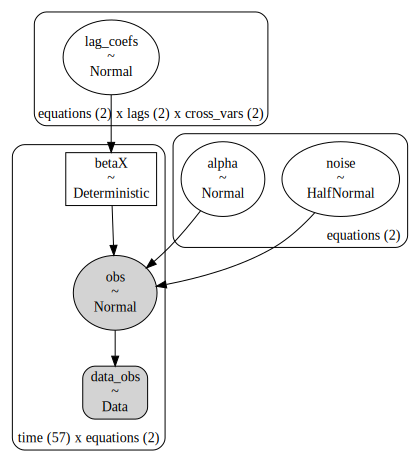

In [58]:
#here is a visualization of what the model would be running...as you can see it's noting super strange
n_lags = 2
n_eqs = 2
priors = {
    "lag_coefs": {"mu": 0.3, "sigma": 1},
    "alpha": {"mu": 15, "sigma": 5},
    "noise_chol": {"eta": 1, "sigma": 1},
    "noise": {"sigma": 1},
}

model_SNPAR4, idata_SMPAR4 = make_model(n_lags, n_eqs, SMD, priors)
pm.model_to_graphviz(model_SNPAR4)

In [18]:
ax = az.plot_posterior(
    idata_SMDAR4,
    var_names="noise_chol_corr",
    hdi_prob="hide",
    group="prior",
    point_estimate="mean",
    grid=(2, 2),
    kind="hist",
    ec="black",
    figsize=(10, 4),)

#this is where I had to stop. I could not get the sampleing of the model to run for some reason in order to get it to run a PPC

NameError: name 'idata_SMDAR4' is not defined

In [20]:
#this was another verion of sampleing I could not get to run
n_lags = 2
n_eqs = 2
priors = {
    ## Set prior for expected positive relationship between the variables.
    "lag_coefs": {"mu": 0.3, "sigma": 1},
    "alpha": {"mu": 6, "sigma": 5, "alpha": -3},
    "noise_chol": {"eta": 1, "sigma": 1},
    "noise": {"sigma": 1},
}
model_SNPAR4, idata_SMDAR4 = make_model(
    n_lags, n_eqs, SMD[["Percent Return", "Month"]], priors, prior_checks=False
)
idata_SMDAR4

/usr/local/lib/python3.10/dist-packages/pymc/data.py:440: FutureWarning: Data is now always mutable. Specifying the `mutable` kwarg will raise an error in a future release
  warnings.warn(


UnboundLocalError: local variable 'idata_SMDAR4' referenced before assignment

Overall we did see that the stock market does have a positive linear trend, and that its posterior is somewhat normal.
As a bonus we learned that timeseires applications are difficult to get working and help some with allowing Pymc to read AR data. More learning must be done on this subject though!!

#Credits

A lot of work went into making this work so I decided that some credit was in order
1. Mr.A for putting up with my complaining and helping me figure out what was going on
2. PYMC forums mainly this one: (/https://www.pymc.io/projects/examples/en/latest/time_series/Time_Series_Generative_Graph.html) for helping me learn how to implement timeseires data
2. Also this one https://www.pymc.io/projects/examples/en/latest/time_series/bayesian_var_model.html